In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

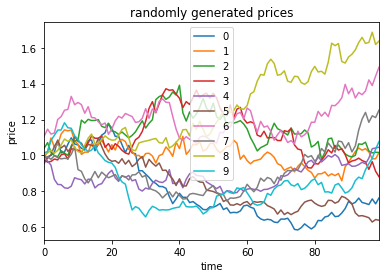

In [9]:
returns = pd.DataFrame(np.random.normal(1,0.03, (100,10)))
prices = returns.cumprod()
prices.plot()
plt.title('randomly generated prices')
plt.xlabel('time')
plt.ylabel('price')
plt.legend(loc=0)


In [15]:
s= pd.Series([1,2,np.nan, 4,5])
print(s)

0    1.0
1    2.0
2    NaN
3    4.0
4    5.0
dtype: float64


In [16]:
s.name='toy series'
print(s.name)

toy series


In [17]:
print(s.index)

RangeIndex(start=0, stop=5, step=1)


In [19]:
new_index = pd.date_range("2016-01-01", periods=len(s), freq='D')
print(new_index)

DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
               '2016-01-05'],
              dtype='datetime64[ns]', freq='D')


In [21]:
s.index = new_index
print(s.index)
s

DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
               '2016-01-05'],
              dtype='datetime64[ns]', freq='D')


2016-01-01    1.0
2016-01-02    2.0
2016-01-03    NaN
2016-01-04    4.0
2016-01-05    5.0
Freq: D, Name: toy series, dtype: float64

In [27]:
print(s.iloc[0])
print(s.iloc[-1])
print(s.iloc[:2])
print(s.iloc[::-1])
print(s.loc['2016-01-04'])

1.0
5.0
2016-01-01    1.0
2016-01-02    2.0
Freq: D, Name: toy series, dtype: float64
2016-01-05    5.0
2016-01-04    4.0
2016-01-03    NaN
2016-01-02    2.0
2016-01-01    1.0
Freq: -1D, Name: toy series, dtype: float64
4.0


In [32]:
print(s <3)
print(s.loc[(s < 3) & (s > 1)])

2016-01-01     True
2016-01-02     True
2016-01-03    False
2016-01-04    False
2016-01-05    False
Freq: D, Name: toy series, dtype: bool
2016-01-02    2.0
Freq: D, Name: toy series, dtype: float64


In [35]:
!pip install pandas-datareader
from datetime import datetime
import pandas_datareader as pdr


In [57]:
prices = pdr.data.DataReader('CMG', 'yahoo', datetime(2018,1,1), datetime(2019,1,1))
prices = prices.iloc[:, 3]

In [58]:
print(prices.head(5))
print(prices.tail())

Date
2018-01-02    292.950012
2018-01-03    309.000000
2018-01-04    307.109985
2018-01-05    313.790009
2018-01-08    318.470001
Name: Close, dtype: float64
Date
2018-12-24    385.839996
2018-12-26    405.720001
2018-12-27    414.549988
2018-12-28    424.190002
2018-12-31    431.790009
Name: Close, dtype: float64


In [59]:
prices.name='CMG'
prices.index

DatetimeIndex(['2018-01-02', '2018-01-03', '2018-01-04', '2018-01-05',
               '2018-01-08', '2018-01-09', '2018-01-10', '2018-01-11',
               '2018-01-12', '2018-01-16',
               ...
               '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20',
               '2018-12-21', '2018-12-24', '2018-12-26', '2018-12-27',
               '2018-12-28', '2018-12-31'],
              dtype='datetime64[ns]', name='Date', length=251, freq=None)

In [70]:
print(type(prices))
monthly_prices = prices.resample('M')
monthly_prices.first().head()

<class 'pandas.core.series.Series'>


Date
2018-01-31    292.950012
2018-02-28    314.720001
2018-03-31    313.260010
2018-04-30    311.160004
2018-05-31    426.010010
Freq: M, Name: CMG, dtype: float64

In [71]:
dir(monthly_prices)

['__bytes__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__unicode__',
 '__weakref__',
 '_accessors',
 '_adjust_binner_for_upsample',
 '_agg_examples_doc',
 '_agg_see_also_doc',
 '_aggregate',
 '_aggregate_multiple_funcs',
 '_apply_filter',
 '_apply_loffset',
 '_apply_whitelist',
 '_assure_grouper',
 '_attributes',
 '_builtin_table',
 '_concat_objects',
 '_constructor',
 '_convert_obj',
 '_cumcount_array',
 '_cython_agg_general',
 '_cython_table',
 '_cython_transform',
 '_deprecations',
 '_dir_additions',
 '_dir_deletions',
 '_downsample',
 '_from_selection',
 '_get_binner',
 '_get_binner_for_time',
 '_get_index',
 '_get_i

In [76]:
calendar_dates = pd.date_range(datetime(2018,1,1), datetime(2019,1,1), freq='D')
print(calendar_dates)

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08',
               '2018-01-09', '2018-01-10',
               ...
               '2018-12-23', '2018-12-24', '2018-12-25', '2018-12-26',
               '2018-12-27', '2018-12-28', '2018-12-29', '2018-12-30',
               '2018-12-31', '2019-01-01'],
              dtype='datetime64[ns]', length=366, freq='D')


In [79]:
calendar_prices = prices.reindex(calendar_dates, method='ffill')
print(calendar_prices.head(15))

2018-01-01           NaN
2018-01-02    292.950012
2018-01-03    309.000000
2018-01-04    307.109985
2018-01-05    313.790009
2018-01-06    313.790009
2018-01-07    313.790009
2018-01-08    318.470001
2018-01-09    319.369995
2018-01-10    321.799988
2018-01-11    325.500000
2018-01-12    327.339996
2018-01-13    327.339996
2018-01-14    327.339996
2018-01-15    327.339996
Freq: D, Name: CMG, dtype: float64


In [84]:
meanfilled_prices = calendar_prices.fillna(calendar_prices.mean())
meanfilled_prices.head(15)

2018-01-01    413.530849
2018-01-02    292.950012
2018-01-03    309.000000
2018-01-04    307.109985
2018-01-05    313.790009
2018-01-06    313.790009
2018-01-07    313.790009
2018-01-08    318.470001
2018-01-09    319.369995
2018-01-10    321.799988
2018-01-11    325.500000
2018-01-12    327.339996
2018-01-13    327.339996
2018-01-14    327.339996
2018-01-15    327.339996
Freq: D, Name: CMG, dtype: float64

In [86]:
bfilled_prices = calendar_prices.fillna(method='bfill')
bfilled_prices.head(15)

2018-01-01    292.950012
2018-01-02    292.950012
2018-01-03    309.000000
2018-01-04    307.109985
2018-01-05    313.790009
2018-01-06    313.790009
2018-01-07    313.790009
2018-01-08    318.470001
2018-01-09    319.369995
2018-01-10    321.799988
2018-01-11    325.500000
2018-01-12    327.339996
2018-01-13    327.339996
2018-01-14    327.339996
2018-01-15    327.339996
Freq: D, Name: CMG, dtype: float64

In [87]:
dropped_prices=calendar_prices.dropna()
dropped_prices.head(15)

2018-01-02    292.950012
2018-01-03    309.000000
2018-01-04    307.109985
2018-01-05    313.790009
2018-01-06    313.790009
2018-01-07    313.790009
2018-01-08    318.470001
2018-01-09    319.369995
2018-01-10    321.799988
2018-01-11    325.500000
2018-01-12    327.339996
2018-01-13    327.339996
2018-01-14    327.339996
2018-01-15    327.339996
2018-01-16    327.369995
Freq: D, Name: CMG, dtype: float64

Text(0.5, 0, 'date')

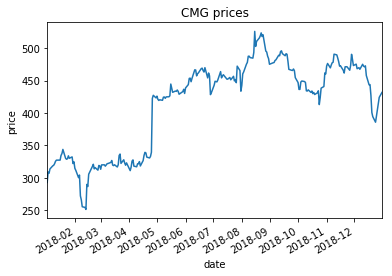

In [89]:
prices.plot()
plt.title('CMG prices')
plt.ylabel('price')
plt.xlabel('date')

In [90]:
prices.describe()

count    251.000000
mean     413.583067
std       69.545918
min      251.330002
25%      329.764999
50%      436.440002
75%      467.669998
max      525.890015
Name: CMG, dtype: float64

In [93]:
modified_prices = prices * 2-10
modified_prices.tail()

Date
2018-12-24    761.679993
2018-12-26    801.440002
2018-12-27    819.099976
2018-12-28    838.380005
2018-12-31    853.580017
Name: CMG, dtype: float64

In [97]:
noisy_prices=prices + 5 * pd.Series(np.random.normal(0,5, len(prices)), index = prices.index) +20
noisy_prices.head(15)

Date
2018-01-02    336.394437
2018-01-03    352.050060
2018-01-04    307.554273
2018-01-05    336.731838
2018-01-08    351.399643
2018-01-09    328.280648
2018-01-10    343.982263
2018-01-11    352.877164
2018-01-12    341.551273
2018-01-16    352.997945
2018-01-17    366.765906
2018-01-18    350.047614
2018-01-19    372.630064
2018-01-22    386.968366
2018-01-23    327.661278
dtype: float64

Date
2018-01-02    292.950012
2018-01-03    309.000000
2018-01-04    307.109985
2018-01-05    313.790009
2018-01-08    318.470001
Name: CMG, dtype: float64
Date
2018-01-02          NaN
2018-01-03    16.049988
2018-01-04    -1.890015
2018-01-05     6.680023
2018-01-08     4.679993
Name: CMG, dtype: float64
Date
2018-01-02         NaN
2018-01-03    0.054787
2018-01-04   -0.006117
2018-01-05    0.021751
2018-01-08    0.014914
Name: CMG, dtype: float64


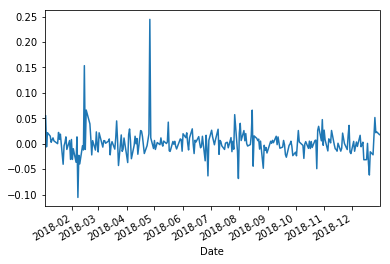

In [104]:
print(prices.head())
add_returns = prices.diff()
print(add_returns.head())
mult_returns = prices.pct_change()
print(mult_returns.head())
mult_returns.plot()

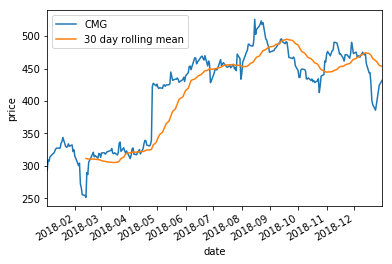

In [109]:
rolling_mean = prices.rolling(30).mean()
rolling_mean.name='30 day rolling mean'

prices.plot()
rolling_mean.plot()
plt.xlabel('date')
plt.ylabel('price')
plt.legend()

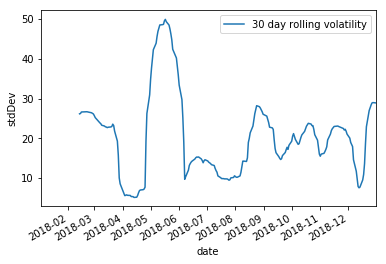

In [110]:
rolling_std = prices.rolling(30).std()
rolling_std.name='30 day rolling volatility'

rolling_std.plot()
plt.xlabel('date')
plt.ylabel('stdDev')
plt.legend()

In [111]:
print(mult_returns.median())

0.0016593617106530623
